In [1]:
from classy import Class
from matplotlib import pyplot as plt
import numpy as np

In [10]:
#### Converting the value of Gamma to km/s/Mpc
from astropy import units as u

### Set the value below
gamma_value = 0.1     # in units Gyr**(-1)

### Conversion takes place below
(gamma_value*u.Gyr**(-1)).to(u.km/u.Mpc/u.s)

<Quantity 97.77922217 km / (Mpc s)>

In [5]:
kmax = 1

## Parameters taken from the paper section 3.1
common_settings = {'output':'mPk','P_k_max_h/Mpc':kmax,
                   'omega_b' : 0.02225,
                   'n_s' : 0.9645,
                   'z_reio' : 9.9
                  }
kk = np.logspace(np.log10(0.001),np.log10(2e-1),1000)

ref = Class()
ref.set(common_settings)
ref.set({
         'omega_cdm':0.1198,
        })
ref.compute()
h = ref.h()

kk = np.logspace(np.log10(1e-3),np.log10(5e-1),1000)
pk_ref = np.vectorize(ref.pk_lin)(kk*h,0)

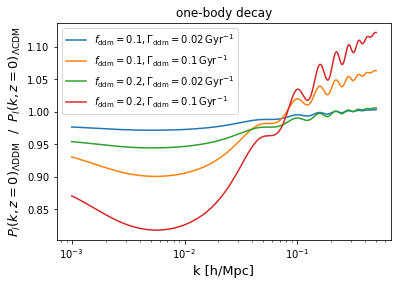

In [22]:
dm = 0.1198

f_list = np.linspace(0.1,0.2,2)
gamma_list = np.linspace(0.02,0.1,2)

for f in f_list:
    for gamma in gamma_list:
        model = Class()
        model.empty()
        model.set(common_settings)
        model.set({
           'omega_dcdmdr' : f*dm,
           'omega_cdm' : dm*(1.-f),
           'Gamma_dcdm' : 9.777922e2*gamma
          })
        model.compute()
        h_model = model.h()
        
        plt.xscale('log')
        plt.yscale('linear')
        
        plt.plot(kk,np.vectorize(model.pk)(kk*h_model,0)/pk_ref,
                 label =r'$f_\mathrm{ddm}='+'{a}'.format(a=f)+', \Gamma_\mathrm{ddm}='+'{a}'.format(a=gamma)+'\, \mathrm{Gyr}^{-1}$')
        
        plt.title('one-body decay')
        plt.ylabel(r'$P_l(k,z=0)_{\Lambda\mathrm{DDM}} \ \ / \ \ P_l(k,z=0)_{\Lambda\mathrm{CDM}}$', fontsize=13)
        plt.xlabel(r'k [h/Mpc]', fontsize=13)
        
        plt.legend()